In [4]:
# 시각화용 한글 사용 가능하게하는 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,934 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120876 files and dire

In [1]:
# 필수 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

# 시각화 결과가 노트북에 포함되도록
%matplotlib inline

In [2]:
plt.rc('font', family='NanumGothic')

# KNN(K-Nearest Neighbor) - 최근접이웃
1. 정의
- 지도학습 알고리즘 중 하나로 가장 간단한 머신러닝 알고리즘이다.
- KNN은 게으른 학습자(Lazy learner)라고도 한다. 게으르다는 표현은 느리거나 그런게 아닌 알고리즘이 판별 함수를 학습하는 것이 아니라 데이터셋을 저장하여 분류하기 때문이다.
- 새로운 데이터와 기존 데이터들 간 거리를 측정하고, 가까운 데이터들의 종류가 무엇인지 확인하여 새로운 데이터의 종류를 판별
- k는 인접한 데이터의 개수로, KNN 알고리즘은 K의 결과에 따라 달라지기 떄문에 K를 정해주는 것이 가장 중요

2. 장점
- 어떤 분포든 상관없다.
- 쉽고 이해하기 직관적
- 샘플 수가 많을 때 좋은 분류법

3. 단점
- 최적의 K를 선택하기 어렵다.
- 데이터가 ㅁ낳을 경우 분석속도가 느릴 수 있다.
- 특정 분포를 가정하지 않기 때문에 샘플 수가 많이 있어야 정확도가 좋다.

4. 특징
- 데이터 기반 분석방법
- 데이터의 분포에 신경쓰지 않는다.
- 회귀와 분류에 모두 적용된다.
- 회귀: KNN의 값을 평균내어 값 예측
- 분류: KNN 중에 가장 많은 항목 선택

# scikit-learn(사이킷런)

## 데이터셋 로딩
- 생선을 분류하기 위해 생선의 길이와 무게를 사용하여 분석한다.
- 35마리의 도미데이터(길이_cm, 무게_g)를 분석
- https://www.kaggle.com/aungpyaeap/fish-market

In [3]:
# 도미 데이터(길이와 무게)
## 생선의 길이
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
                31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
                34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
                38.5, 38.5, 39.5, 41.0, 41.0]
## 생선의 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0,
                450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0,
                700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0,
                925.0, 975.0, 950.0]

- 머신러닝에서 여러 개의 종류(혹은 클래스_class) 중 하나를 구별해 내는 문제를 분류(Classification)이라고 부른다.
- 두 개의 클래스 중 하나를 고르는 분류를 이진 분류라고 한다.

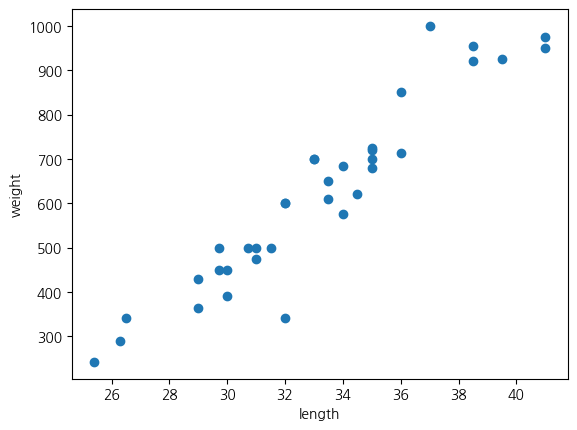

In [4]:
# 도미 데이터의 분포를 파악하기 위한 산점도
## scatter(산점도): 좌표상의 점들을 표시하여 두 개 변수 간의 관계를 나타낸다.
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [5]:
# 14마리의 빙어 데이터(길이와 무게)
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
                12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4,
                12.2, 19.7, 19.9]

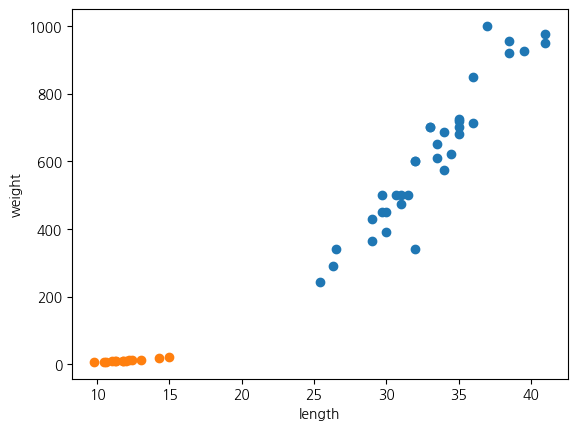

In [6]:
# 도미와 빙어 데이터 분포를 위한 시각화
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 사이킷런의 최근접알고리즘
- 사이킷런을 이용해야 하니 데이터를 2차원 리스트로 정리해야한다.

In [7]:
# 도미와 빙어 데이터 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [8]:
# length와 weight를 특성(열)으로 가지는 2차원 리스트로 만들기
# 왜? 사이킷런은 2차우너 리스트를 필요로 한다.
fish_data = [[l,w] for l, w in zip(length, weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


- zip()은 나열된 리스트에서 각각 원소하나씩 꺼내서 반환한다.
- 첫번째 생선의 길이 25.4cm와 무게 242.0g이 하나의 리스틀르 구성하고 이런 리스트가 모여 전체 리스트가 만들어 졌다. 이런 리스트를 2차원 리스트 또는 리스트의 리스트라고 부른다.

In [9]:
# 찾는 대상: 도미(1)로 설정
fish_target = [1] *35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


- 머신러닝에서 2개를 구분하는 경우 찾으려는 대상을 1로 놓고 그 외에는 0으로 놓는다.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
# 객체 생성
kn = KNeighborsClassifier()  # 괄호 안에 k(이웃 수)를 담을 수 있다. default = 5

# 훈련: fish_data와 fish_target을 전달하여 도미를 찾기 위한 기준을 학습시킨다.
kn.fit(fish_data, fish_target)  # fit(문제, 정답)

# 정확도: 분류모델의 성능 확인
# 0에서 1사이의 값을 반환한다. 1은 모든 데이터를 정확히 맞췄다는 의미. 0.5라면 절반만 맞췄다는 의미
kn.score(fish_data, fish_target)

1.0

In [11]:
# predict()는 새로운 데이터의 정답 판단(예측): 길이와 무게
kn.predict([[30, 600]])  # 1: 도미, 2: 빙어

array([1])

- 우리가 가지고 있는fish_data로 훈련시키고, 테스트 또한 fish_data로 진행시켰다.
- 즉, 위 코드 중 kn.score(fish_data, fish_target)이 잘못된 것이다.
- 이건 원래 알고 있었던 답안지로 테스트 한 격이다. 당연히 100% 정답이라는 결과가 나온다.
- 그러므로 원래는 train data와 test data를 따로 두어야 한다.

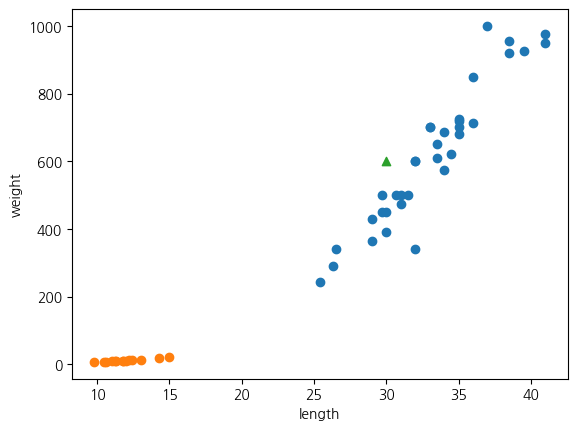

In [13]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [14]:
# _fit_x 속성에 우리가 전달한 fish_data를 모두 가지고 있다.
# _y 속성에 fish_target을 가지고 있다
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [15]:
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


## K-최근접 이웃 알고리즘
1. 특징: "가장 가까운 데이터(직선거리)"를 파악하여